<a href="https://colab.research.google.com/github/AmulyaMat/lung-nodule-segmentation/blob/main/BMIAProject_U_NET_Amulya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lung Nodule Segmentation: LUNA 16 Dataset

## Models to try:

1. **U-NET**

2. YOLO v3

3. Swin-UNET

In [ ]:
from google.colab import drive
drive.mount("drive")

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


ENSURE YOU ARE USING T4 GPU ON COLAB!

# 1. U-NET implementation - Test inference

## a. Import Libraries

In [ ]:
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt

## b. Load the testX.npy and testY.npy files

In [ ]:

testX = np.load("/content/drive/MyDrive/testX.npy").astype(np.float32)
testY = np.load("/content/drive/MyDrive/testY.npy").astype(np.float32)


In [ ]:
testX = (testX-127.0)/127.0
testY = (testY>127).astype(np.float32)

## c. Define dice_coef and dice_coef_loss functions

In [ ]:
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (K.sum(y_true_f) + K.sum(y_pred_f) + 1)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

## d. Load model using checkpoint from drive

In [ ]:
#model_c = tf.keras.models.load_model("/content/drive/MyDrive/checkpoint-054-0.690.hdf5", custom_objects={'dice_coef':dice_coef, 'dice_coef_loss':dice_coef_loss})
model = tf.keras.models.load_model("/content/drive/MyDrive/LC2_v2_UNet_best_Model_checkpoint.h5", custom_objects={'dice_coef':dice_coef, 'dice_coef_loss':dice_coef_loss})

In [ ]:
with tf.device("/device:GPU:0"):
  pred = model.predict(testX)
  #pred_c = model_c.predict(testX)

2/2 [==============================] - 127s 31s/step


## e.  Evaluate model

In [ ]:
model.evaluate(testX, testY)

2/2 [==============================] - 104s 32s/step - loss: -0.7807 - dice_coef: 0.7946 - binary_accuracy: 0.9997


[-0.7806825041770935, 0.7946337461471558, 0.9996716976165771]

## f. Display results

In [ ]:
"def display(true, pred, X, m=0, n=50):
  n = len(list(true[m:n]))
  r = n//2 if n%2==0 else (n//2)+1
  plt.figure(figsize=(20,5*r))
  for i,(t, p, x) in enumerate(zip(true[m:n],pred[m:n],X[m:n])):
    t = np.squeeze(t)
    p = np.squeeze(p)
    x = np.squeeze(x)
    groundtruth = cv2.addWeighted(x,.5,t,.5,0)
    prediction = cv2.addWeighted(x,.5,p,.5,0)
    plt.subplot(r,2,i+1)
    plt.title("GroundTruth"+" "*36+"Prediction")
    ig = np.hstack((groundtruth, prediction))
    plt.imshow(ig, cmap="bone")


In [ ]:
testY_sm = testY[0:5]
pred_sm = pred[0:5]
testX_sm = testX[0:5]

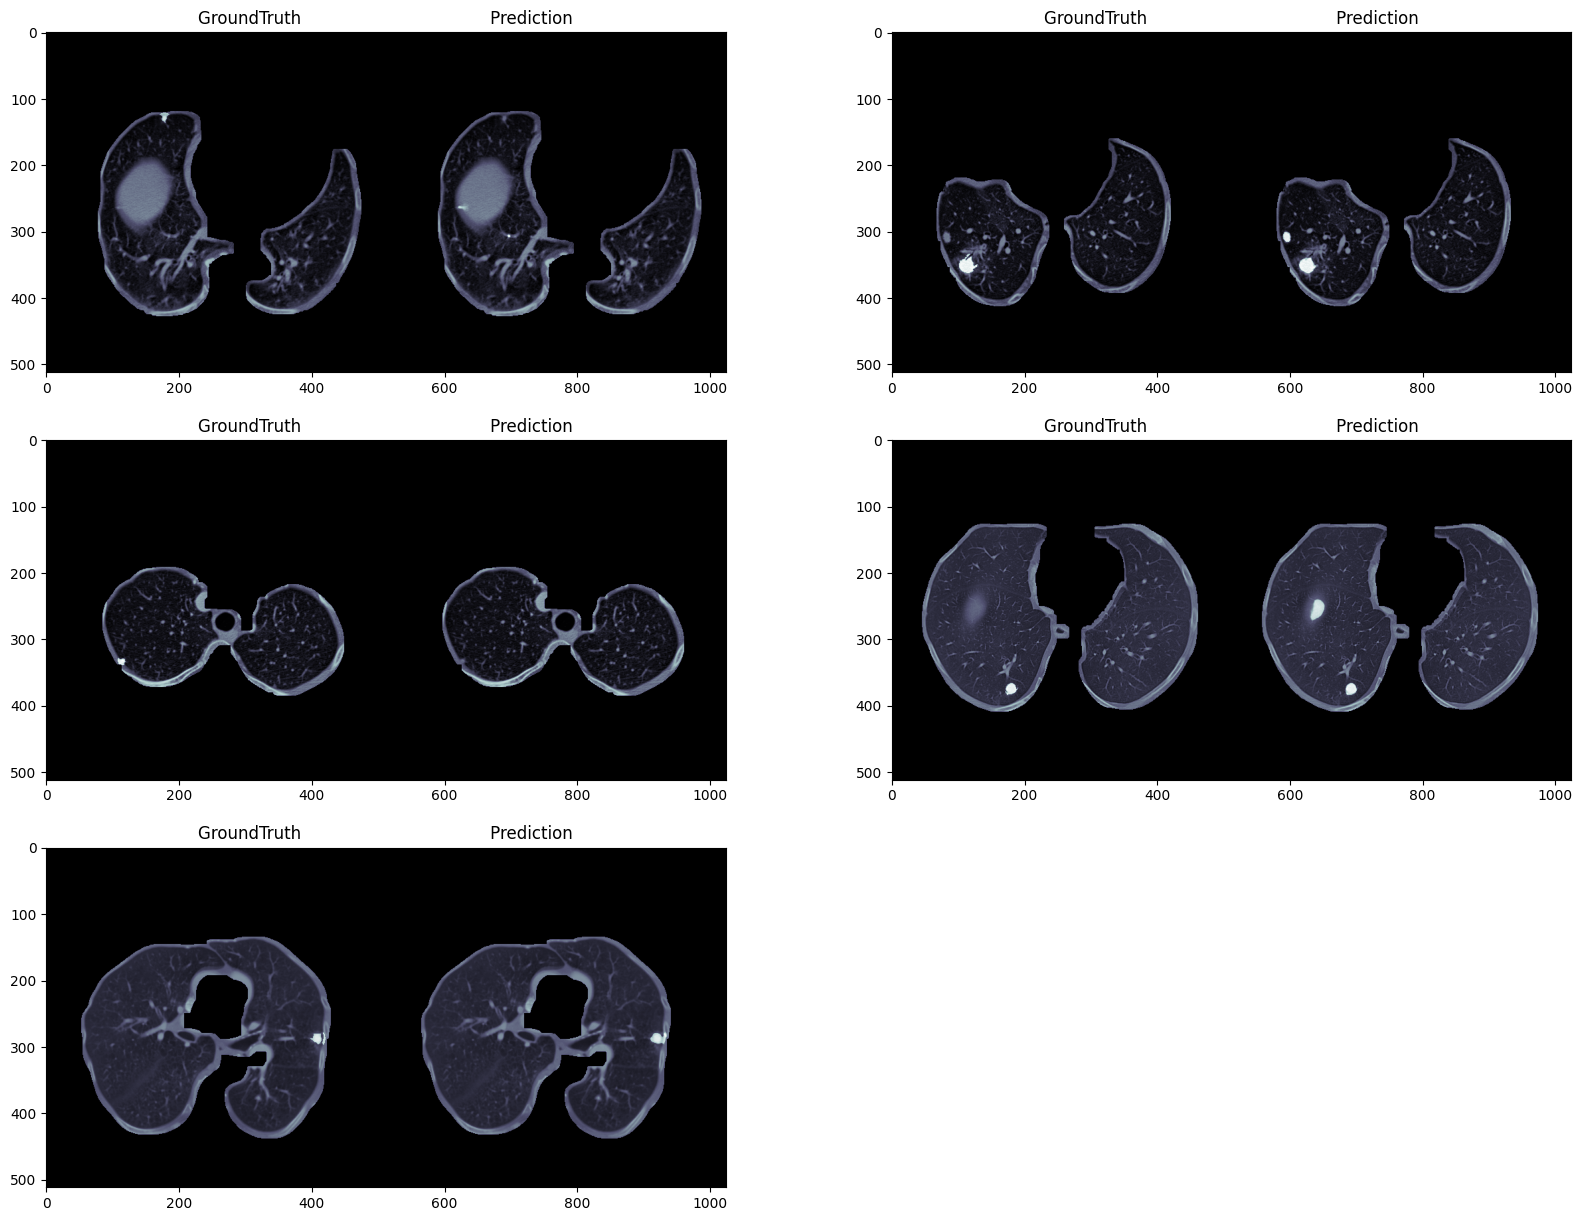

In [ ]:
display(testY_sm,pred_sm,testX_sm)